# ANALYSING THE YOUTUBE TRENDING VIDEOS DATASET

Answers to be given by analysing:-


1. Which channel had the most trending videos, likes, comments and dislikes
2. Which video had the most views , likes ,comments and dislikes?
3. Which video category raked up the most views, likes,comments and dislikes ?
4. Whether there’s a relationship between the views , comments and likes ?
5. Most common words used in video and channel titles

RoadMap to be Followed :-

1. Prepare the environment
2. Read and Examine the dataset
3. Clean the Data
4. Derive meaningful insights
5. Visualize the insights

# PREPARE THE ENVIRONMENT

In [3]:
!pip install wordcloud

In [4]:
!pip install STOPWORDS
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ANSHUL
[nltk_data]     AGARWAL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import patsy
import datetime
import statsmodels.api as sm
from matplotlib import cm
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

# READ AND EXAMINE THE DATASET

In [6]:
videos_df = pd.read_csv(r"D:\Trending video all\youtube-new\INvideos.csv")
videos_df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [7]:
videos_df.shape

(37352, 16)

In [8]:
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB


In [9]:
videos_df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [10]:
videos_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [11]:
videos_df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,37352,37352,37352,37352,37352,37352,37352,36791
unique,16307,205,16721,1426,16339,12578,16523,13992
top,#NAME?,17.24.11,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,2018-04-21T13:30:01.000Z,[none],https://i.ytimg.com/vi/rRr1qiJRsXk/default.jpg,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,511,200,19,284,18,1381,16,166


# CLEAN THE DATA!

In [12]:
del_cols = [ 'thumbnail_link','comments_disabled','ratings_disabled', 'video_error_or_removed', 'description']
videos_df = videos_df.drop(del_cols, axis=1)

In [13]:
videos_df.duplicated().value_counts()

False    33089
True      4263
dtype: int64

In [14]:
videos_df = videos_df.drop_duplicates(keep = 'first')

In [15]:
def clean_trending_date(date):
    y,d,m = date.split('.')
    return datetime.date(int(y)+2000,int(m),int(d))

def clean_publish_time(time):
    y,m,d = time.split('T')[0].split('-')
    return datetime.date(int(y), int(m), int(d))

In [16]:
videos_df['trending_date'] = videos_df['trending_date'].apply(clean_trending_date)
videos_df['publish_time'] = videos_df['publish_time'].apply(clean_publish_time)

In [17]:
videos_df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0


# NLP for Title

In [18]:
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

videos_df['title'] = videos_df['title'].apply(clean_titles)

In [19]:
videos_df['category_id'] = videos_df['category_id'].astype(str)

In [20]:
categories_df = pd.read_json('D:\Trending video all\youtube-new\IN_category_id.json')


In [21]:
id_to_category = {}
for category in categories_df['items']:
    id_to_category[category['id']] = category['snippet']['title']

In [22]:
videos_df.insert(4, 'category', videos_df['category_id'].map(id_to_category))

In [23]:
videos_df.head(4)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,kzwfHumJyYc,2017-11-14,sharry cute munda song parmish verma releasing...,Lokdhun Punjabi,Film & Animation,1,2017-11-12,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882
1,zUZ1z7FwLc8,2017-11-14,पर रह,HJ NEWS,News & Politics,25,2017-11-13,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0
2,10L1hZ9qa58,2017-11-14,stylish star allu arjun chaysam wedding recept...,TFPC,Entertainment,24,2017-11-12,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149
3,N1vE8iiEg64,2017-11-14,eruma saani tamil vs english,Eruma Saani,Comedy,23,2017-11-12,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684


# DERIVE MEANINGFUL INSIGHTS

In [24]:
def print_top5(column_of_interest,column_stats):
    df = videos_df.groupby(column_of_interest)['views', 'likes',    'comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())
    return df.sort_values(by=column_stats, ascending=False).head()
def visualize_top(column_of_interest, column_stats):
    most_viewed_df = videos_df.groupby([column_of_interest])[column_stats].sum().reset_index()
    sorted_df= most_viewed_df.sort_values(column_stats, ascending=False).iloc[:9]
    ax = sorted_df.plot.bar(figsize = (10,11))
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df[column_of_interest]:
        labels.append(item[:20] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=12)
    plt.show()

In [25]:
print_top5('title','views')

,views,likes,comment_count,dislikes
title,,,,
marvel infinity war official trailer,811186072,27858601,3685538,490552
youtube shape,493586083,13673422,4270117,6865746
sanju official teaser ranbir kapoor rajkumar hirani,443836608,8963286,554937,322239
venom official trailer,399787896,10102349,1108156,347701
,393611598,2474306,332874,407672


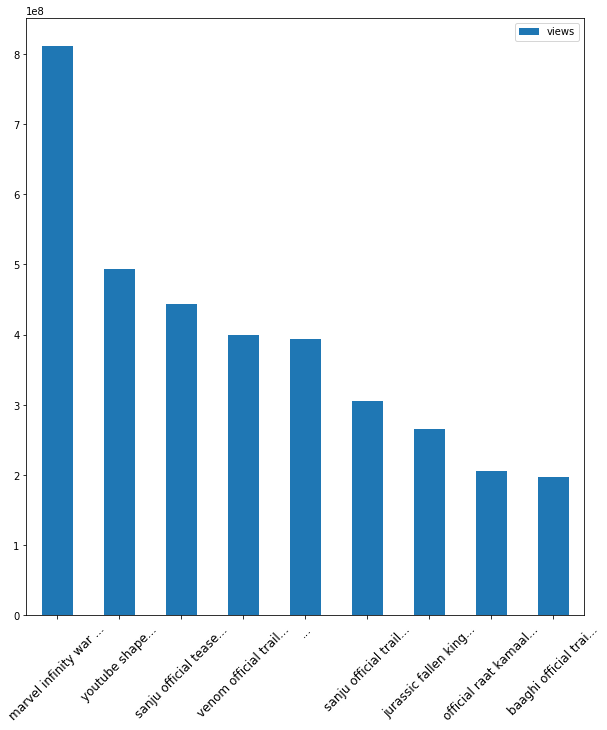

In [26]:
visualize_top('title','views')

In [27]:
print_top5('title', 'likes')

,views,likes,comment_count,dislikes
title,,,,
marvel infinity war official trailer,811186072,27858601,3685538,490552
youtube shape,493586083,13673422,4270117,6865746
venom official trailer,399787896,10102349,1108156,347701
taylor swift end game ed future,182389129,9282486,791473,493357
sanju official teaser ranbir kapoor rajkumar hirani,443836608,8963286,554937,322239


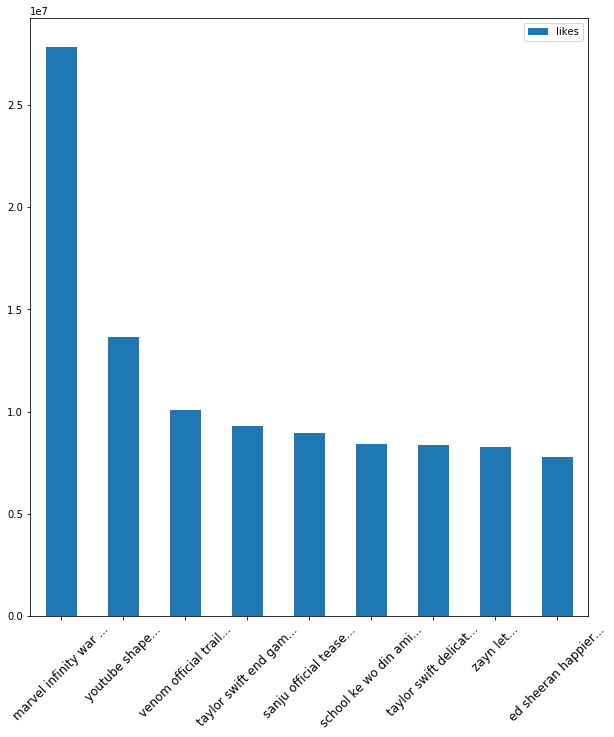

In [28]:
visualize_top('title','likes')

In [29]:
print_top5('title' , 'comment_count')

,views,likes,comment_count,dislikes
title,,,,
youtube shape,493586083,13673422,4270117,6865746
marvel infinity war official trailer,811186072,27858601,3685538,490552
samsung galaxy j6 unboxing giveaway,9015708,1493615,1409922,23866
venom official trailer,399787896,10102349,1108156,347701
oneplus top features giveaway oneplus avengers edition,3048357,1047363,1079576,6628


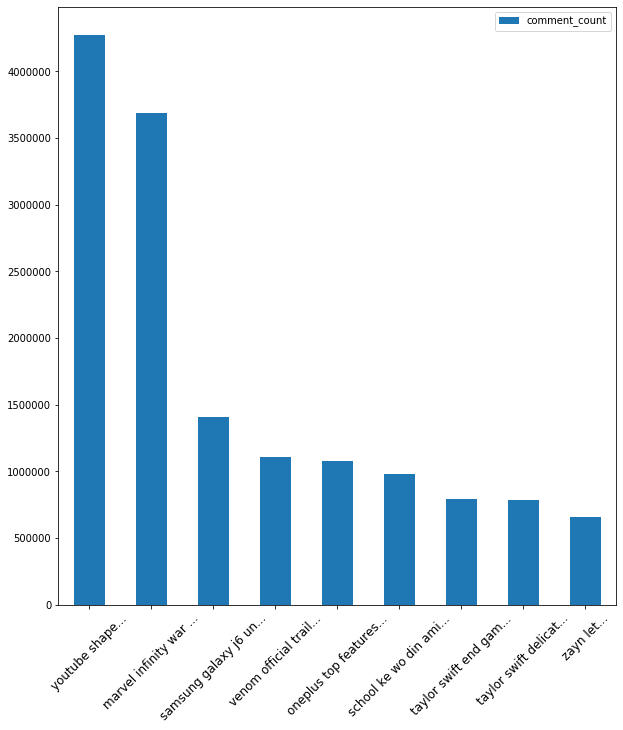

In [30]:
visualize_top('title','comment_count')

In [31]:
print_top5('title', 'dislikes')

,views,likes,comment_count,dislikes
title,,,,
youtube shape,493586083,13673422,4270117,6865746
race official trailer salman khan remo dsouza releasing 15th june,114153203,2719899,458876,729731
selfish song video race salman jacqueline atif iulia vantur vishal,72840483,1170446,239372,556594
kaala official teaser rajinikanth pa ranjith dhanush santhosh narayanan,134211749,3945149,231467,502137
taylor swift end game ed future,182389129,9282486,791473,493357


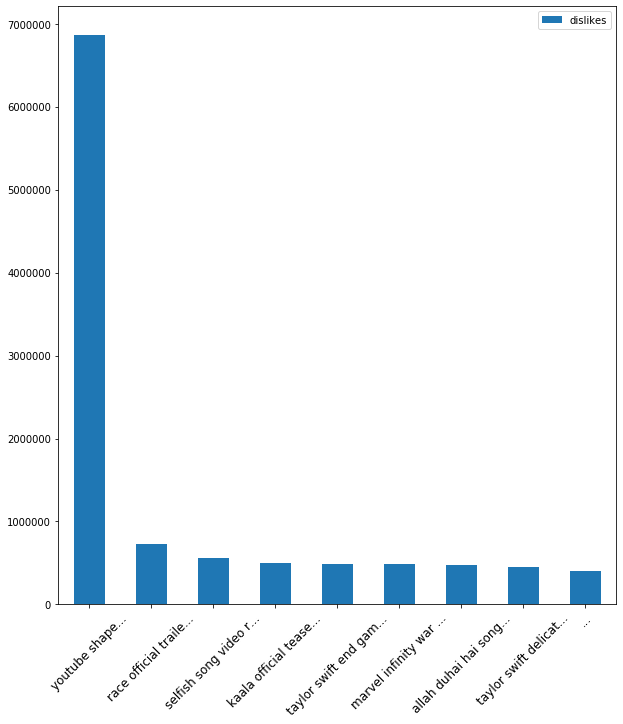

In [32]:
visualize_top('title','dislikes')

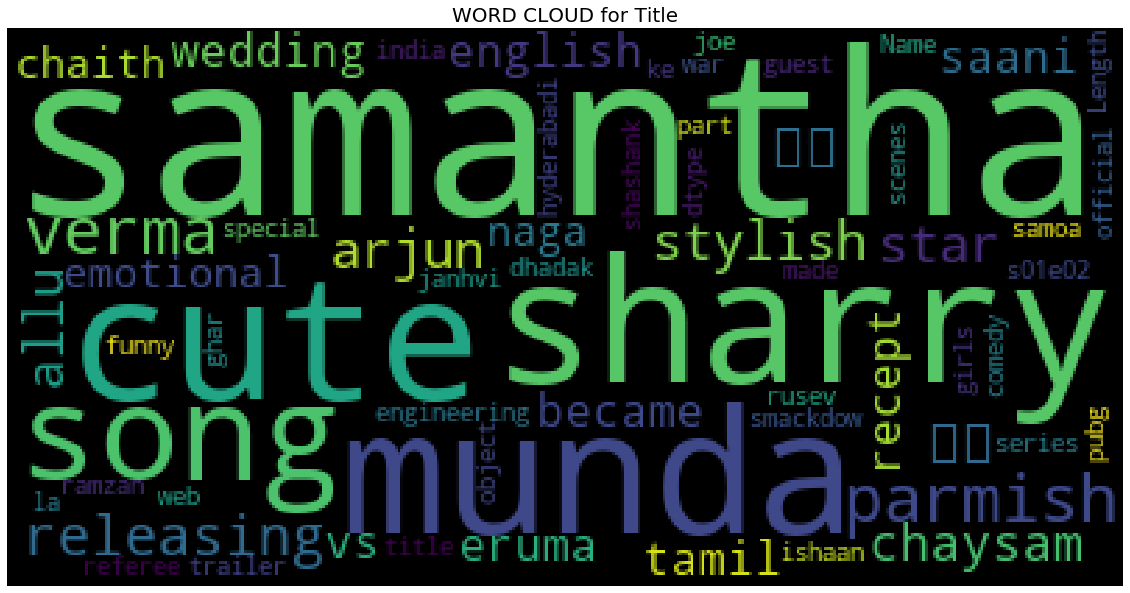

In [33]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',stopwords = stopwords,max_words = 1000,max_font_size = 120,random_state = 42).generate(str(videos_df['title']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Title', fontsize = 20)
plt.axis('off')
plt.show()

In [34]:
print_top5('channel_title', 'views')

,views,likes,comment_count,dislikes
channel_title,,,,
T-Series,1748057724,31812724,2163936,2196417
Marvel Entertainment,1058174340,34188269,4201145,620004
FoxStarHindi,982953616,19260709,1422502,764425
Amit Bhadana,855533181,52376821,5480376,1902575
Speed Records,648890913,17611166,1191255,836043


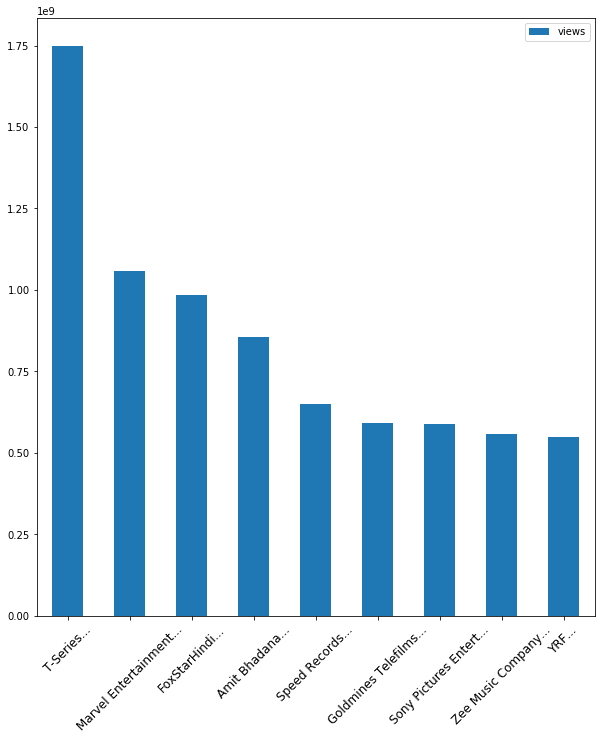

In [35]:
visualize_top('channel_title','views')

In [36]:
print_top5('channel_title', 'likes')

,views,likes,comment_count,dislikes
channel_title,,,,
Amit Bhadana,855533181,52376821,5480376,1902575
Marvel Entertainment,1058174340,34188269,4201145,620004
T-Series,1748057724,31812724,2163936,2196417
ashish chanchlani vines,382825238,28395149,1997416,791050
BB Ki Vines,373407504,27843390,2538615,604404


In [37]:
print_top5('channel_title', 'comment_count')

,views,likes,comment_count,dislikes
channel_title,,,,
Technical Guruji,96689802,11059642,6387995,347543
Amit Bhadana,855533181,52376821,5480376,1902575
YouTube Spotlight,493586083,13673422,4270117,6865746
Marvel Entertainment,1058174340,34188269,4201145,620004
PewDiePie,315130354,23881068,2760018,599555


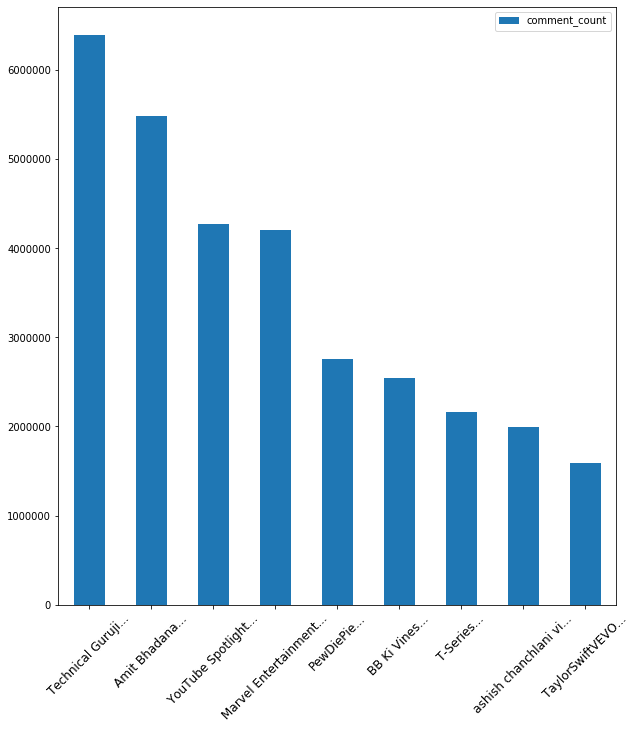

In [38]:
visualize_top('channel_title','comment_count')

In [39]:
print_top5('channel_title', 'dislikes')

,views,likes,comment_count,dislikes
channel_title,,,,
YouTube Spotlight,493586083,13673422,4270117,6865746
T-Series,1748057724,31812724,2163936,2196417
Amit Bhadana,855533181,52376821,5480376,1902575
Tips Official,299296928,5645684,823193,1514936
TaylorSwiftVEVO,371053358,17784714,1585565,949029


In [40]:
videos_df['channel_title'].value_counts().head()

VikatanTV             208
SAB TV                206
ETV Plus India        206
etvteluguindia        205
Study IQ education    202
Name: channel_title, dtype: int64

In [41]:
print_top5('category','views')

,views,likes,comment_count,dislikes
category,,,,
Entertainment,13326399551,328229550,35486403,23577924
Music,8336504205,213063323,14558095,12072772
Film & Animation,3273144924,57790703,4844060,3645206
Comedy,2423485988,146425199,11560689,5723206
News & Politics,1658578208,13449502,2535027,2286562


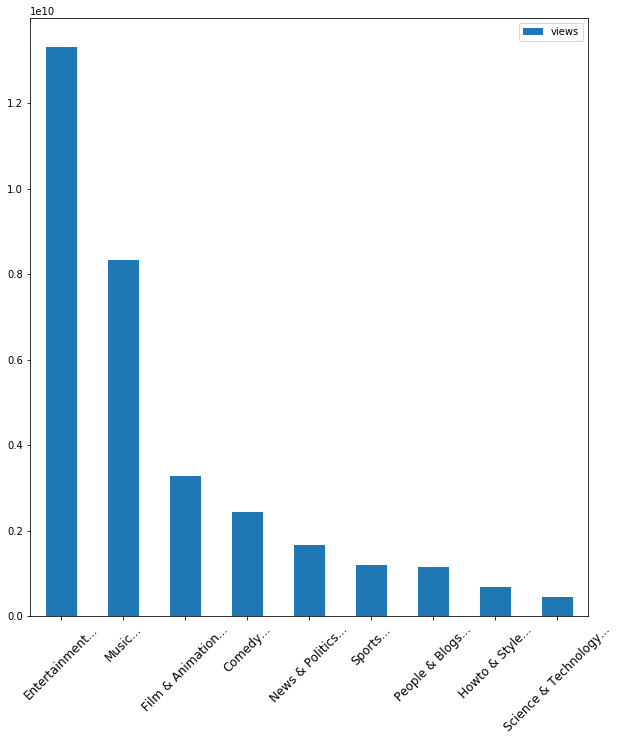

In [42]:
visualize_top('category','views')

In [43]:
print_top5('category', 'likes')

,views,likes,comment_count,dislikes
category,,,,
Entertainment,13326399551,328229550,35486403,23577924
Music,8336504205,213063323,14558095,12072772
Comedy,2423485988,146425199,11560689,5723206
Film & Animation,3273144924,57790703,4844060,3645206
Sports,1192613734,28473825,2346624,1088494


In [44]:
print_top5('category', 'comment_count')

,views,likes,comment_count,dislikes
category,,,,
Entertainment,13326399551,328229550,35486403,23577924
Music,8336504205,213063323,14558095,12072772
Comedy,2423485988,146425199,11560689,5723206
Science & Technology,435729557,18121097,7580486,818134
Film & Animation,3273144924,57790703,4844060,3645206


In [45]:
print_top5('category', 'dislikes')

,views,likes,comment_count,dislikes
category,,,,
Entertainment,13326399551,328229550,35486403,23577924
Music,8336504205,213063323,14558095,12072772
Comedy,2423485988,146425199,11560689,5723206
Film & Animation,3273144924,57790703,4844060,3645206
News & Politics,1658578208,13449502,2535027,2286562


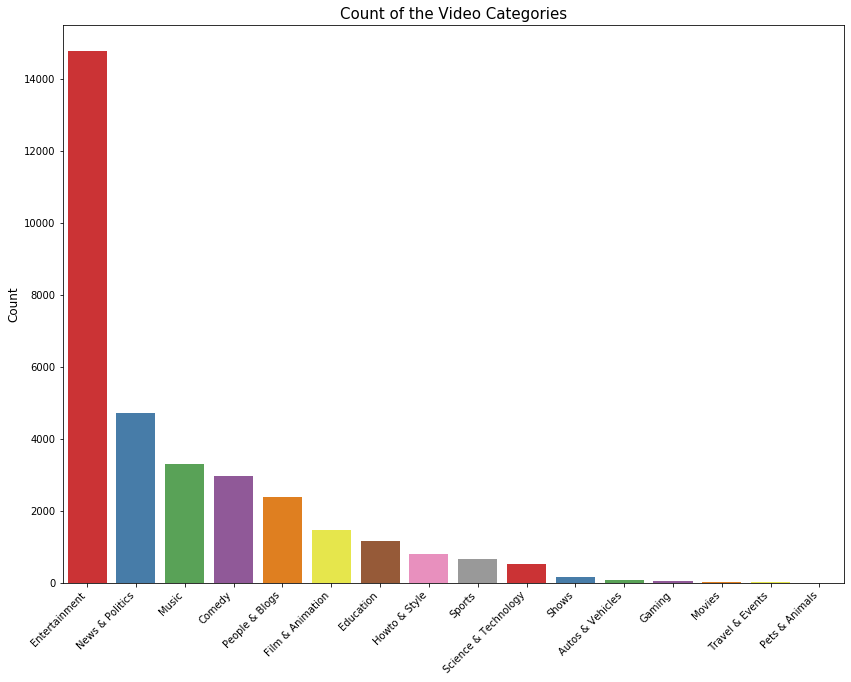

In [46]:
plt.figure(figsize = (14,10))
g = sns.countplot('category', data = videos_df, palette="Set1", order = videos_df['category'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

In [47]:
#Dislike and Engagement Measurement
# Create converted rates/ratio columns
videos_df['comment_rate'] = videos_df['comment_count'] / videos_df['views']
videos_df['dislike_rate'] =  videos_df['dislikes'] / videos_df['views']
videos_df['dislike_ratio'] = videos_df['dislikes'] / (videos_df['dislikes'] + videos_df['likes'])

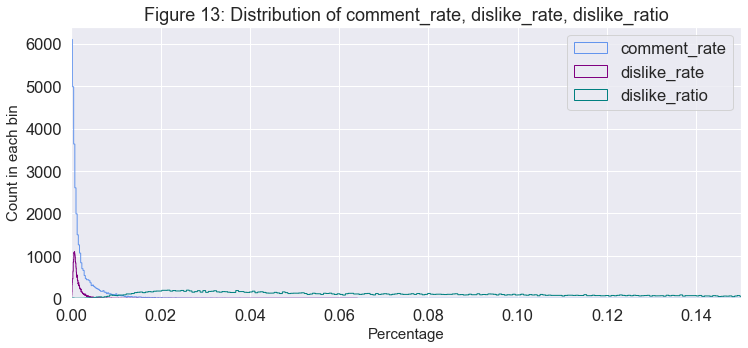

In [49]:
# Plot distribution of comment rate, dislike rate, and dislike ratio
plt.figure(figsize=(12,5))
plt.hist(videos_df['comment_rate'],label='comment_rate',bins=1500,
         color='cornflowerblue', histtype='step')
plt.hist(videos_df['dislike_rate'],label='dislike_rate',bins=1500,
         color ='purple', histtype='step')
plt.hist(videos_df['dislike_ratio'],label='dislike_ratio',bins=1500,
         color='teal', histtype='step')
plt.title("Figure 13: Distribution of comment_rate, dislike_rate, dislike_ratio", 
         fontsize=18)
sns.set(font_scale=1.5)
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Count in each bin", fontsize=15)
plt.xlim(0,0.15)
plt.legend()
plt.show()


In [50]:
columns_of_interest = ['views', 'likes', 'dislikes','comment_count']
corr_matrix = videos_df[columns_of_interest].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.852704,0.551652,0.697749
likes,0.852704,1.000000,0.499926,0.792815
dislikes,0.551652,0.499926,1.000000,0.740269
comment_count,0.697749,0.792815,0.740269,1.000000


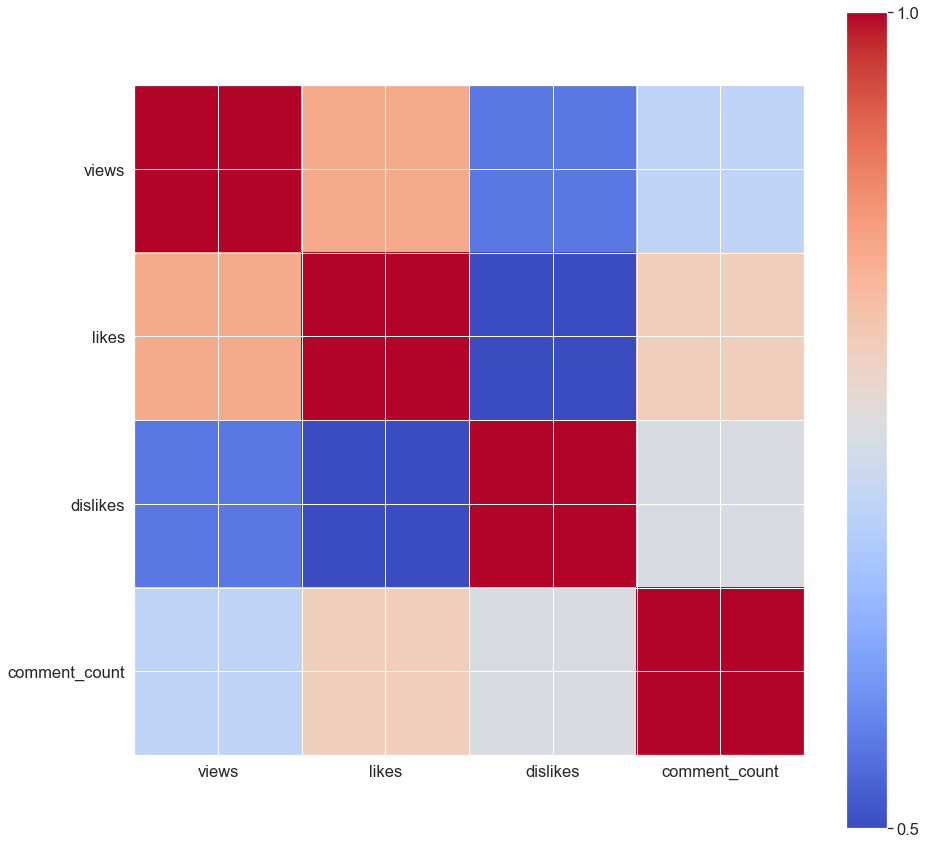

In [51]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)
# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])
# making the labels
labels = ['']
for column in columns_of_interest:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)
plt.show()

# WordCloud

In [112]:
def wordcloud_column(column):
 plt.figure(figsize = (20,20))
 stopwords = set(STOPWORDS)
 wordcloud = WordCloud(background_color = 'black',stopwords = stopwords,max_words = 1000,max_font_size = 120,random_state = 42).generate(str(videos_df[column]))
 plt.imshow(wordcloud)
 plt.title('WORD CLOUD for '+column.upper(), fontsize = 20)
 plt.axis('off')
 plt.show()

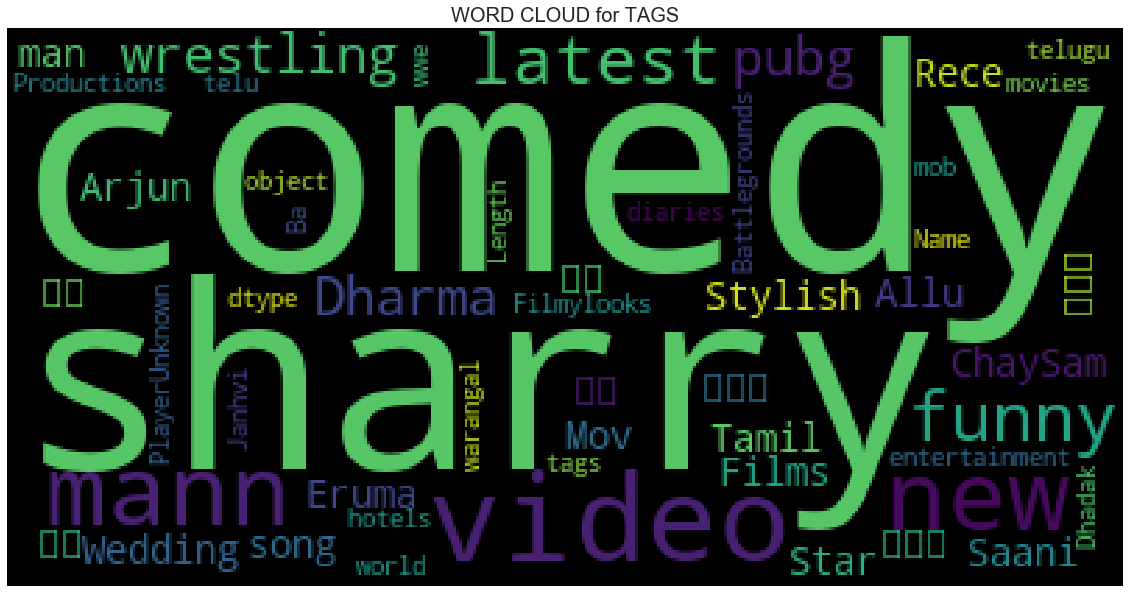

In [113]:
wordcloud_column('tags')

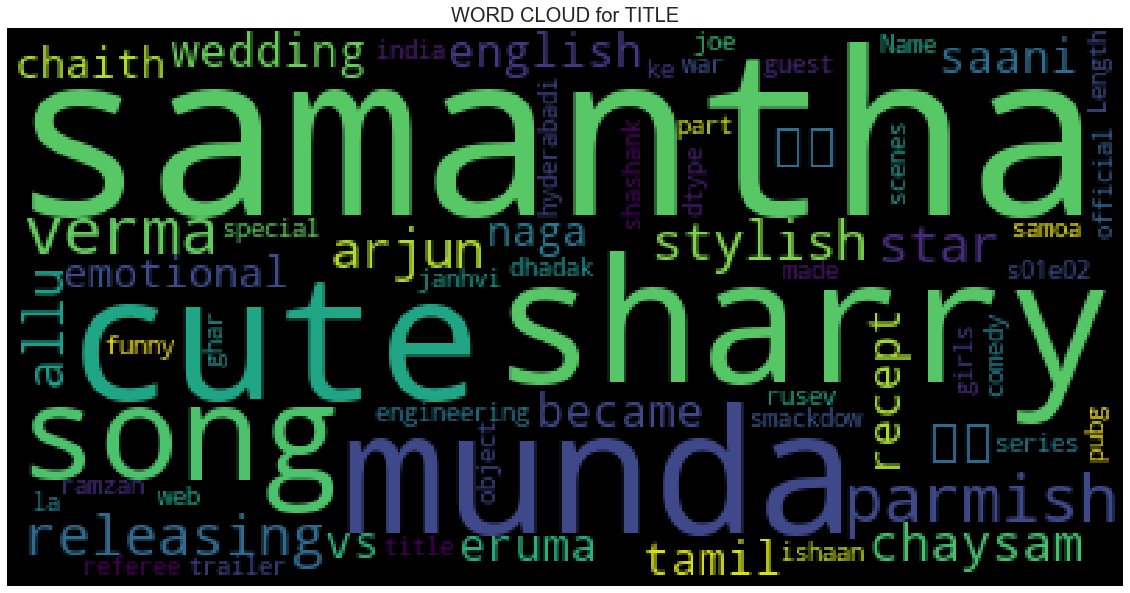

In [114]:
wordcloud_column('title')